In [1411]:
import numpy as np
import pandas as pd

In [1412]:
df = pd.read_csv('/content/drive/MyDrive/AIProjectWithML/Dataset/heart.xls')

In [1413]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [1414]:
target = df['target']

In [1415]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [1416]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [1417]:
df.groupby('thal').count()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
thal,,,,,,,,,,,,,
0,2,2,2,2,2,2,2,2,2,2,2,2,2
1,18,18,18,18,18,18,18,18,18,18,18,18,18
2,166,166,166,166,166,166,166,166,166,166,166,166,166
3,117,117,117,117,117,117,117,117,117,117,117,117,117


# Taking Care of Categorical Variables

In [1418]:
for i in range(0, 303):
  if df['sex'][i] == 1:
   df['sex'][i] = 'Yes'
  else:
   df['sex'][i] = 'No'
for i in range(0, 303):
  if df['cp'][i] == 0:
   df['cp'][i] = 'Zero CP'
  elif df['cp'][i] == 1:
   df['cp'][i] = 'First CP'
  elif df['cp'][i] == 2:
   df['cp'][i] = 'Second CP'
  else:
   df['cp'][i] = 'Third CP'
for i in range(0, 303):
  if df['fbs'][i] == 1:
   df['fbs'][i] = 'Yes FBS'
  else:
   df['fbs'][i] = 'No FBS'
for i in range(0, 303):
  if df['restecg'][i] == 1:
   df['restecg'][i] = 'Yes ECG'
  else:
   df['restecg'][i] = 'No ECG'
for i in range(0, 303):
  if df['exang'][i] == 1:
   df['exang'][i] = 'Yes EXANG'
  else:
   df['exang'][i] = 'No EXANG'
for i in range(0, 303):
  if df['slope'][i] == 0:
   df['slope'][i] = 'Zero SLOPE'
  elif df['slope'][i] == 1:
   df['slope'][i] = 'First SLOPE'
  else:
   df['slope'][i] = 'Second SLOPE'
for i in range(0, 303):
  if df['thal'][i] == 0:
   df['thal'][i] = 'Zero THAL'
  elif df['thal'][i] == 1:
   df['thal'][i] = 'First THAL'
  elif df['thal'][i] == 2:
   df['thal'][i] = 'Second THAL'
  else:
   df['thal'][i] = 'Third THAL'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [1419]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Yes,Third CP,145,233,Yes FBS,No ECG,150,No EXANG,2.3,Zero SLOPE,0,First THAL,1
1,37,Yes,Second CP,130,250,No FBS,Yes ECG,187,No EXANG,3.5,Zero SLOPE,0,Second THAL,1
2,41,No,First CP,130,204,No FBS,No ECG,172,No EXANG,1.4,Second SLOPE,0,Second THAL,1
3,56,Yes,First CP,120,236,No FBS,Yes ECG,178,No EXANG,0.8,Second SLOPE,0,Second THAL,1
4,57,No,Zero CP,120,354,No FBS,Yes ECG,163,Yes EXANG,0.6,Second SLOPE,0,Second THAL,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,No,Zero CP,140,241,No FBS,Yes ECG,123,Yes EXANG,0.2,First SLOPE,0,Third THAL,0
299,45,Yes,Third CP,110,264,No FBS,Yes ECG,132,No EXANG,1.2,First SLOPE,0,Third THAL,0
300,68,Yes,Zero CP,144,193,Yes FBS,Yes ECG,141,No EXANG,3.4,First SLOPE,2,Third THAL,0
301,57,Yes,Zero CP,130,131,No FBS,Yes ECG,115,Yes EXANG,1.2,First SLOPE,1,Third THAL,0


In [1420]:
df = pd.get_dummies(df, columns=["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"], drop_first=True)

In [1421]:
df.head()

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_Yes,cp_Second CP,cp_Third CP,cp_Zero CP,fbs_Yes FBS,restecg_Yes ECG,exang_Yes EXANG,slope_Second SLOPE,slope_Zero SLOPE,thal_Second THAL,thal_Third THAL,thal_Zero THAL
0,63,145,233,150,2.3,0,1,1,0,1,0,1,0,0,0,1,0,0,0
1,37,130,250,187,3.5,0,1,1,1,0,0,0,1,0,0,1,1,0,0
2,41,130,204,172,1.4,0,1,0,0,0,0,0,0,0,1,0,1,0,0
3,56,120,236,178,0.8,0,1,1,0,0,0,0,1,0,1,0,1,0,0
4,57,120,354,163,0.6,0,1,0,0,0,1,0,1,1,1,0,1,0,0


In [1422]:
df_target = df.drop('target', axis = 1)

In [1423]:
df_target['target'] = target

In [1424]:
df_final = df_target

In [1425]:
df_final.head()

,age,trestbps,chol,thalach,oldpeak,ca,sex_Yes,cp_Second CP,cp_Third CP,cp_Zero CP,fbs_Yes FBS,restecg_Yes ECG,exang_Yes EXANG,slope_Second SLOPE,slope_Zero SLOPE,thal_Second THAL,thal_Third THAL,thal_Zero THAL,target
0,63,145,233,150,2.3,0,1,0,1,0,1,0,0,0,1,0,0,0,1
1,37,130,250,187,3.5,0,1,1,0,0,0,1,0,0,1,1,0,0,1
2,41,130,204,172,1.4,0,0,0,0,0,0,0,0,1,0,1,0,0,1
3,56,120,236,178,0.8,0,1,0,0,0,0,1,0,1,0,1,0,0,1
4,57,120,354,163,0.6,0,0,0,0,1,0,1,1,1,0,1,0,0,1


In [1426]:
X = df_final.iloc[:, :-1].values
y = df_final.iloc[:, -1].values

In [1427]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Feature Scaling

In [1428]:
X_train_sep = X_train[:, 0:5]
X_test_sep = X_test[:, 0:5]

In [1429]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sep = sc.fit_transform(X_train_sep)
X_test_sep = sc.transform(X_test_sep)

In [1430]:
from pickle import dump
dump(sc, open('scaler.pkl', 'wb'))

In [1431]:
X_train = X_train[:, 5:]
X_test = X_test[:, 5:]

In [1432]:
X_train = np.append(X_train, X_train_sep, axis=1)
X_test = np.append(X_test, X_test_sep, axis=1)

# Training the Model

In [1433]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', C=60)
classifier.fit(X_train, y_train)

SVC(C=60, kernel='linear')

# Predictions

In [1434]:
y_train_pred = classifier.predict(X_train)

In [1435]:
y_pred = classifier.predict(X_test)

# Accuracy and other Metrics

In [1436]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_train_pred)
print(cm)
print('Train Accuracy: {}%'.format(round(accuracy_score(y_train, y_train_pred), 4)*100))

[[ 87  23]
 [ 13 119]]
Train Accuracy: 85.11999999999999%


In [1437]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Test Accuracy: {}%'.format(round(accuracy_score(y_test, y_pred), 4)*100))

[[20  8]
 [ 0 33]]
Test Accuracy: 86.89%


In [1438]:
#Function for plotting Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
%matplotlib inline

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [1439]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [1440]:
cm_plot_labels = ['No Heart Disease','Heart Disease']

Confusion matrix, without normalization
[[20  8]
 [ 0 33]]


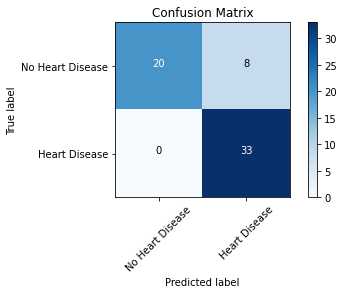

In [1441]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [1442]:
#Calculating Senstivity (Basically, this is the metric that is really important for medical diagnosis)
#Sensitivity is a measure of the proportion of actual positive cases that got predicted as positive (or true positive).
#Senstivity = True Positives / (True Positives + False Negatives)

senstivity = cm[1][1]/(cm[1][1]+cm[1][0])
print('Senstivity: {}%'.format(round(senstivity, 3)*100))

Senstivity: 100.0%


In [1443]:
#Calculating Specificity
#Specificity is defined as the proportion of actual negatives, which got predicted as the negative (or true negative).
#Specificity = True Negatives / (True Negatives + False Positives)

specificity = cm[0][0]/(cm[0][0]+cm[0][1])
print('Specificity: {}%'.format(round(specificity, 3)*100))

Specificity: 71.39999999999999%


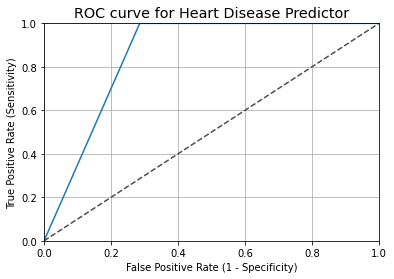

In [1444]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Heart Disease Predictor')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [1445]:
auc(fpr, tpr)

0.8571428571428572

# Saving the Model

In [1448]:
# import pickle

# with open('svm_linear_model_with_regularization', 'wb') as f:
#   pickle.dump(classifier, f)